In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 

In [44]:
def load_data(data_path):
    ds = pd.read_csv(data_path)
    y = ds['Survived']
    X = ds.drop('Survived', axis=1)
    X = X.drop('Name', axis=1)
    X = X.drop('Ticket', axis=1)
    X = X.drop('Cabin', axis=1)
    X = X.drop('Embarked', axis=1)
    
    X = X.drop('Age', axis=1)
    X = X.drop('Sex', axis=1)
    
    #X = X['Sex'].replace(('male', 'female'), (1, 0), inplace=True)
    
    #X = X.drop('Age', axis=1)
    #X = X[~X['Age'].isnull()]
    
    sc = StandardScaler()
    sc.fit(X)
    X_ans = sc.transform(X)
    return X_ans, y

In [45]:
X, y = load_data("Titanic.csv")

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn import svm

In [49]:
best_model = svm.SVC(kernel='linear', C=1, gamma=1)

In [50]:
best_model.fit(X_train , y_train)

SVC(C=1, gamma=1, kernel='linear')

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
model_params = best_model.get_params()
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['gamma'] = range(1, 100)
clf = GridSearchCV(best_model, tuned_params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
best_params = clf.best_params_

In [53]:
from sklearn import metrics
best_model = svm.SVC(**best_params)
best_model.fit(X_train, y_train)
predicted = best_model.predict(X_test)

In [54]:
print('Used params:', best_params)
print('Evaluation:\n', metrics.classification_report(y_test, predicted))

Used params: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       105
           1       0.59      0.68      0.63        74

    accuracy                           0.67       179
   macro avg       0.67      0.67      0.67       179
weighted avg       0.68      0.67      0.67       179



In [55]:
model=svm.SVC()

params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}

model_svm = GridSearchCV(model, param_grid=params, n_jobs=-1)
model_svm.fit(X_train,y_train)

print("Best Params:\n",model_svm.best_params_)

prediction=model_svm.predict(X_test)

print("Report:\n",metrics.classification_report(prediction,y_test))

Best Params:
 {'C': 6, 'kernel': 'rbf'}
Report:
               precision    recall  f1-score   support

           0       0.92      0.70      0.80       138
           1       0.45      0.80      0.57        41

    accuracy                           0.73       179
   macro avg       0.68      0.75      0.69       179
weighted avg       0.81      0.73      0.75       179



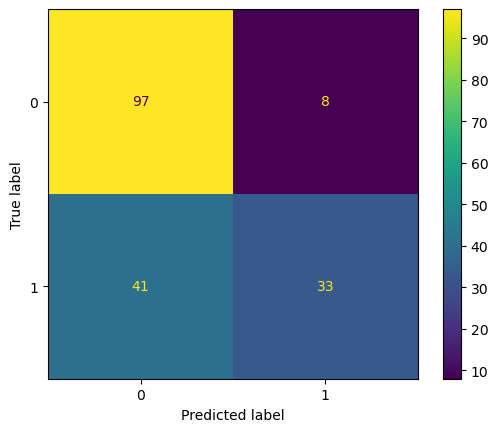

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Обучите вашу модель
model_svm.fit(X_train, y_train)

# Получите предсказания модели на тестовых данных
y_pred = model_svm.predict(X_test)

# Создайте матрицу ошибок
cm = confusion_matrix(y_test, y_pred)

# Создайте ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Отобразите матрицу ошибок
disp.plot()
plt.show()